Case: 165.05343404378644, control: 191.00054318016936
Case: 146.73994398017425, control: 173.03368648290967
Case: 309.71666891258155, control: 308.0598364830278
Case: 266.06477229200084, control: 263.42411928729103
Case: 204.71277255074978, control: 235.89704122279286
Case: 120.21467131694327, control: 147.12783376588504
Case: 268.76944935229295, control: 259.57350752383695
Case: 144.91782328281778, control: 171.94864342394396
Case: 178.77998909126939, control: 206.53883485225134
Case: 159.06927685433934, control: 191.07569596227728
Case: 134.39754039922423, control: 157.81421832616542
Case: 183.40213717195203, control: 218.6144500798008
Case: 274.19872524026215, control: 270.8279251234004
Case: 279.86407258475515, control: 265.28915169811086
Case: 159.19739830474506, control: 187.28473634894473
Case: 219.0991216909921, control: 210.8565924074574
Case: 158.4391307865278, control: 191.0344548926183
Case: 135.6374869894213, control: 159.28071489978157
Case: 81.97218842901246, control: 10

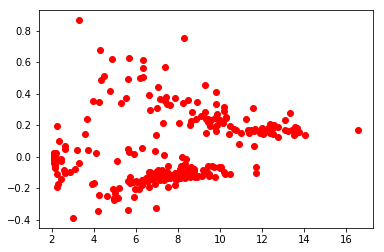

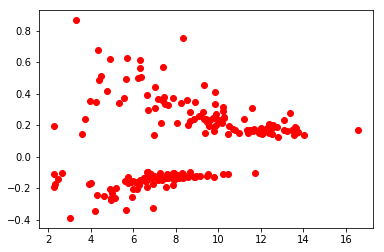

['FARP2', 'MMP25', 'SERPINB1', 'SLC4A8', 'SLC2A3', 'MYO9A', 'OSBPL3', 'RAD18', 'TRIB2', 'IL4R', 'CST7', 'DOPEY1', 'CD59', 'DDHD2', 'MTMR2', 'L2HGDH', 'NLRC4', 'TSPO', 'PYGL', 'C20orf24', 'NFATC2', 'PPP1R16B', 'APMAP', 'KLF8', 'TNFSF13B', 'EEF2K', 'AQP9', 'NAMPT', 'FKTN', 'FAM20A', 'BST1', 'MS4A4A', 'ST3GAL4', 'UST', 'SLC26A8', 'MAPK14', 'VNN2', 'LMNB1', 'BCL6', 'CBLB', 'GCA', 'KMT2A', 'RAB32', 'NDUFB3', 'CYSTM1', 'ZNF549', 'SRGN', 'SLPI', 'CHD6', 'AMOT', 'WDR60', 'METTL16', 'SAT1', 'TULP4', 'GMFG', 'GSE1', 'FLOT2', 'PATJ', 'LAMTOR5', 'IL2RA', 'ETS1', 'FBXO21', 'DYSF', 'TXN', 'CASP5', 'ZNF365', 'ANXA3', 'RPL14P1', 'GPR84', 'BCL2A1', 'CMTM2', 'ATP8B2', 'S100A8', 'PHLDB2', 'CXorf57', 'ADM', 'PLCH2', 'FCGR1A', 'ANK3', 'ACSL1', 'GLT1D1', 'SLFN13', 'FBXO32', 'PTPDC1', 'GALNT14', 'FCER1G', 'HLCS', 'RGL4', 'HK3', 'IKZF3', 'NOL9', 'ALPL', 'S100A9', 'S100A12', 'DCAF16', 'PROK2', 'CCDC191', 'PPM1K', 'GYG1', 'ZDHHC19', 'BRI3', 'FOXK1', 'WEE1', 'CLEC4D', 'NLRC3', 'KIF5C', 'CA5B', 'FAM153A', 'METTL7

In [46]:
filename = 'dif_exp.txt'
import math 
import matplotlib.pyplot as plt
def cont(file_name):
    with open (file_name) as f:
        line = f.readline()
        elements = line.strip().split('\t')
        for ind,el in enumerate(elements):
            if el == 'control':
                k_control_ind = ind
            elif el == 'case':
                break
        dif_exp = {}
        sum_control = 0
        sum_case = 0
        all_sum = 0
        for line in f:
            first_gene = line.strip().split('\t')
            for i in range(1,k_control_ind+1):
                sum_control += float(first_gene[i])
#             print (1,k_control+1)    
            mid_control = sum_control / k_control_ind
            for i in range (k_control_ind + 1,len(first_gene)):
                sum_case += float(first_gene[i]) 
            print ('Case: {}, control: {}'.format(sum_case, sum_control))

            mid_case = sum_case / (len(first_gene) - k_control_ind-1)
#             print (k_control + 1,len(first_gene))
            for i in range (1,len(first_gene)):
                all_sum += float(first_gene[i])
#             print (1,len(first_gene))    
            mid_all_sum = all_sum / (len(first_gene)-1) 
            log_f_c = math.log2(mid_case / mid_control)
            dif_exp[first_gene[0]] = [log_f_c, mid_all_sum]
            sum_control = 0
            sum_case = 0
            all_sum = 0
#             print (mid_all_sum)
            
    print (dif_exp['OSBPL3']) 
    log_f_c1 = []
    mid_all_sum1 = []
    for value in dif_exp.values():
        log_f_c1.append(value[0])
        mid_all_sum1.append(value[1])
    plt.plot(mid_all_sum1,log_f_c1,'ro')
    plt.show()
    target_genes = []
    target_genes_log_f_c = []
    mid_target_sum = []
    for key in dif_exp:
        if abs(dif_exp[key][0]) >= 0.1:
            target_genes_log_f_c.append(dif_exp[key][0])
            mid_target_sum.append(dif_exp[key][1])
            target_genes.append(key)
    plt.plot(mid_target_sum,target_genes_log_f_c,'ro')
    plt.show()        
    print (target_genes)        
    with open("/Users/vvpetrov/Desktop/Python_Bio/def_exp.txt", 'w') as out:
        out.write('gene_symbol\tlog_f_c\n')
        for key in dif_exp:
            out.write('{}\t{}\n'.format(key,dif_exp[key][0]))           
            
    
            
cont('/Users/vvpetrov/Desktop/norm_camp.tsv')   


